# Name : Purvil Mehta
# ID       : 201701073
# Lab    : 5

In [2]:
import random as rd
import numpy as np
import math
import pylab as plt
import pandas as pd
import QuantLib as ql # version 1.5
import matplotlib.pyplot as plt
%matplotlib inline

# initialization Varibles

In [3]:
st = pd.read_csv("RELIANCE_Lab5.csv")
data = st['Returns']
sigma = np.std(data)
sigma = sigma*math.sqrt(252)

In [4]:
maturity_date = ql.Date(26, 3, 2020)
spot_price = 1426.6
strike_price = 1440
volatility = sigma # the historical vols for a year
dividend_rate =  0
option_type = ql.Option.Call

risk_free_rate = 5.06/100
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(25, 2, 2020)
ql.Settings.instance().evaluationDate = calculation_date

# Construct the European Option

In [5]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [6]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

In [7]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print ("The theoretical price is ", bs_price)

The theoretical price is  38.14511009356076


In [8]:
def binomial_price(bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    european_option.setPricingEngine(binomial_engine)
    return european_option.NPV()

steps = range(2, 100, 1)
prices = [binomial_price(bsm_process, step) for step in steps]

# Plotting the results

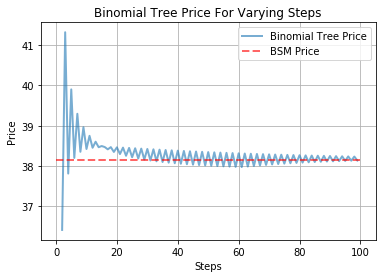

In [10]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,100],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()
plt.grid()